## Categorical Identity Features
---

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(f'np=={np.__version__}')
print(f'pd=={pd.__version__}')
print(f'sns=={sns.__version__}')

/var/folders/69/s6p755q576qb2bbk9bc__tr40000gn/T/ipykernel_61463/2515852810.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


np==1.26.4
pd==2.2.0
sns==0.13.2


#### Categorical Features
---
* id_12 - id_38
* DeviceType
* DeviceInfo

In [4]:
cat_features = [
    'TransactionID',    # Unique identifier
    'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
    'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 
    'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
    'DeviceType', 'DeviceInfo'
    ]
len(cat_features)

30

In [5]:
# test_identity = pd.read_csv('/Users/oskarwallberg/desktop/kaggle-datasets/ieee-fraud-detection/test_identity.csv')
# print(test_identity.shape)
train_identity = pd.read_csv('/Users/oskarwallberg/desktop/kaggle-datasets/ieee-fraud-detection/train_identity.csv')
# train_transaction = pd.read_csv('/Users/oskarwallberg/desktop/kaggle-datasets/ieee-fraud-detection/train_transaction.csv')

train_cat = train_identity[cat_features].copy()
train_cat.shape

(144233, 30)

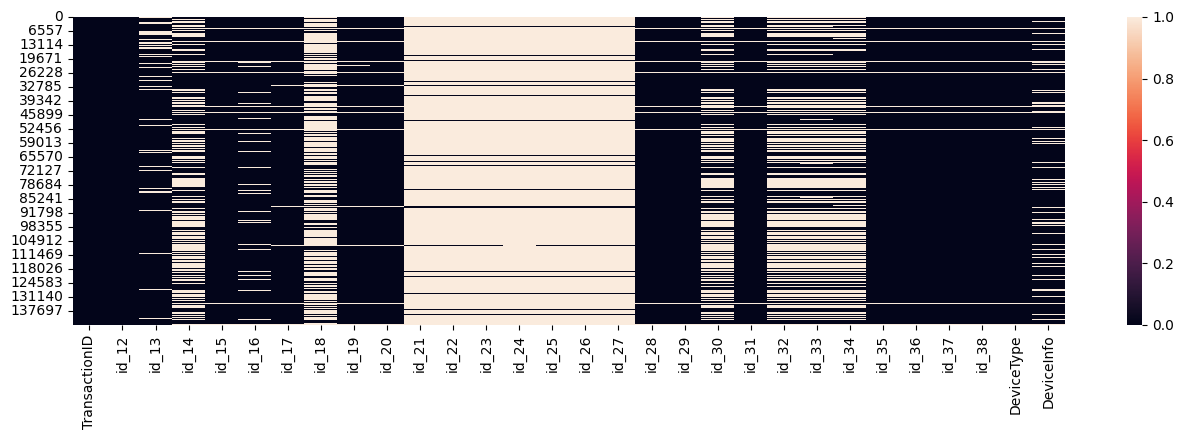

In [7]:
plt.figure(figsize=(16, 4))
sns.heatmap(data=train_cat.isna(), cbar=True)
plt.show()

//NOTE: Features with similar NaNs:
- id_12 ? 
- id_13 ?
- id_14 - id_30 - id_32 - id_33 - id_34
- id_15 - id_28 - id_29 - id_35 - id_36 - id_37 - id_38
- id_17 - id_19 - id_20
- id_18 ?
- id_21 - id_22 - id_23 - id_24 - id_25 - id_26 - id_27
- DeviceType quite similar to id_35->id_38
- DeviceInfo ? 

In [6]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_12          144233 non-null  object 
 2   id_13          127320 non-null  float64
 3   id_14          80044 non-null   float64
 4   id_15          140985 non-null  object 
 5   id_16          129340 non-null  object 
 6   id_17          139369 non-null  float64
 7   id_18          45113 non-null   float64
 8   id_19          139318 non-null  float64
 9   id_20          139261 non-null  float64
 10  id_21          5159 non-null    float64
 11  id_22          5169 non-null    float64
 12  id_23          5169 non-null    object 
 13  id_24          4747 non-null    float64
 14  id_25          5132 non-null    float64
 15  id_26          5163 non-null    float64
 16  id_27          5169 non-null    object 
 17  id_28          140978 non-nul

In [7]:
for col in cat_features:
    print(train_cat[col].value_counts(), end='\n\n')

TransactionID
2987004    1
3334440    1
3334371    1
3334400    1
3334406    1
          ..
3098051    1
3098049    1
3098047    1
3098046    1
3577534    1
Name: count, Length: 144233, dtype: int64

id_12
NotFound    123025
Found        21208
Name: count, dtype: int64

id_13
52.0    58099
49.0    26365
64.0    14429
33.0    10048
27.0     3666
20.0     2878
14.0     2499
63.0     1468
19.0     1147
25.0     1066
43.0      842
62.0      813
18.0      688
41.0      654
55.0      523
11.0      373
15.0      372
24.0      318
35.0      317
51.0      196
61.0      108
44.0       85
54.0       67
28.0       59
39.0       34
31.0       29
45.0       26
38.0       22
13.0       21
58.0       17
36.0       15
48.0       10
32.0       10
56.0        9
30.0        7
22.0        5
53.0        4
17.0        3
57.0        3
21.0        3
46.0        3
47.0        3
60.0        3
12.0        2
26.0        2
23.0        1
29.0        1
59.0        1
34.0        1
40.0        1
10.0        1
37.0     

### Non encoded categorical identity features
* id_14 : timezone (always multiple of ±30 in range [-720, 720])

* id_23 : ip_proxy {transparent, anonymous, hidden}   -> NOTE see how many fraud are in each category...

* Validation processes, found/notfound devices?
    - id_12 (no NaNs) (binary 1/0)
    - id_27 (many NaNs) (binary 1/0)
    - id_29 (few NaNs) (binary 1/0)

* Found (existing) or New (new) device or Unknown (unregisterable?)
    - id_15 (few NaNs)
    - id_28 (few NaNs)

* id_30 : operating_system
* id_31 : web_browser
* id_33 : screen_resolution

* id_34 : match_status {2, 1, 0, -1}

* True or False features
    - id_35, id_36, id_37, id_38 : true_false (binary 1/0)

* DeviceType : mobile {desktop, mobile} (binary 1/0)
* DeviceInfo : 

### DeviceInfo - Value Groupings
---
* Common:
    - Windows
    - iOS
    - MacOS
    - rv (firefox browser version...? perhaps)
    - Samsung (SM)
    - Motorola
    - Huawei
    - LG
    - HTC
* Less common
    - Pixel
    - Lenovo
* Other - Category of their own

### id_30 (operating_system) - Value Groupings
---
* Android 
Versions : 4.4.2 ,5.0 ,5.0.2 ,5.1.1 ,6.0 ,6.0.1 ,7.0 ,7.1.1 ,7.1.2 ,8.0.0 ,8.1.0

* Linux

* Mac OS X 
Versions : 10.10 ,10.11 ,10.12 ,10.13 ,10.6 ,10.9 ,10_10_5 ,10_11_3 ,10_11_4 ,10_11_5 ,10_11_6 ,10_12 ,10_12_1 ,10_12_2 ,10_12_3 ,10_12_4 ,10_12_5 ,10_12_6 ,10_13_1 ,10_13_2 ,10_13_3 ,10_13_4 ,10_13_5 ,10_6_8 ,10_7_5 ,10_8_5 ,10_9_5

* Windows
Versions : 10, 7, 8, 8.1, Vista, XP

* func

* iOS 
Versions : 10.0.2 ,10.1.1 ,10.2.0 ,10.2.1 ,10.3.1 ,10.3.2 ,10.3.3 ,11.0.0 ,11.0.1 ,11.0.2 ,11.0.3 ,11.1.0 ,11.1.1 ,11.1.2 ,11.2.0 ,11.2.1 ,11.2.2 ,11.2.5 ,11.2.6 ,11.3.0 ,11.3.1 ,11.4.0 ,11.4.1 ,9.3.5

* other (only 15 in count)

### id_31 (web_browser) - Value Groupings
---

* Samsung
    - Versions : /SCH, /SM-G531H, /SM-G532M

* android
    - Versions : browser 4.0, webview 4.0
* Generic/Android
* Generic/Android 7.0

* chrome
    - Versions : 49.0, 51.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 69.0, generic
    - Versions for iOS : 62.0, 63.0, 64.0, 65.0, 66.0
    - Versions for android : 43.0, 46.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, generic
* chromium

* edge
    - Versions : 13.0, 14.0, 15.0, 16.0, 17.0

* firefox
    - Versions : 47.0, 48.0, 52.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, generic, mobile 61.0
* Mozilla/Firefox

* google search 
    - Versions : application 48.0, application 49.0
* google

* ie
    - Versions : 11.0 for desktop, 11.0 for tablet

* mobile safari 
    - Versions : 10.0, 11.0, 8.0, 9.0, generic, uiwebview
* mobile

* opera
    - Versions : 49.0, 51.0, 52.0, 53.0, generic

* safari 
    - Versions : 10.0 ,11.0 ,9.0 ,generic

* samsung browser
    - Versions : 3.3 ,4.0 ,4.2 ,5.2 ,5.4 ,6.2 ,6.4 ,7.0 ,generic
* samsung 

* Mixed one-ofs: 
Microsoft/Windows
BLU/Dash
Cherry
Inco/Minion
LG/K-200
Lanix/Ilium
M4Tel/M4
Nokia/Lumia
ZTE/Blade
aol
comodo
cyberfox
facebook
icedragon
iron
line
maxthon
palemoon
puffin
seamonkey
silk
waterfox

* other


In [12]:
# example feature engineering
train_cat['id_12'].transform(lambda x: 1 if x=='Found' else 0)


0         0
1         0
2         0
3         0
4         0
         ..
144228    0
144229    0
144230    0
144231    0
144232    0
Name: id_12, Length: 144233, dtype: int64

---
### # BREAK # ###
---

In [9]:
train_trns = pd.read_csv('/Users/oskarwallberg/desktop/kaggle-datasets/ieee-fraud-detection/train_transaction.csv')
train_trns.shape

(590540, 394)

In [10]:
train_trns['TransactionID'].nunique(), \
train_idty['TransactionID'].nunique()

NameError: name 'train_idty' is not defined

In [ ]:
# Join Train datasets (Identity and Transaction) on TransactionID to add isFraud
df_join = pd.merge(left=train_idty, right=train_trns[['TransactionID', 'isFraud']], on='TransactionID')
df_join.shape

(144233, 42)

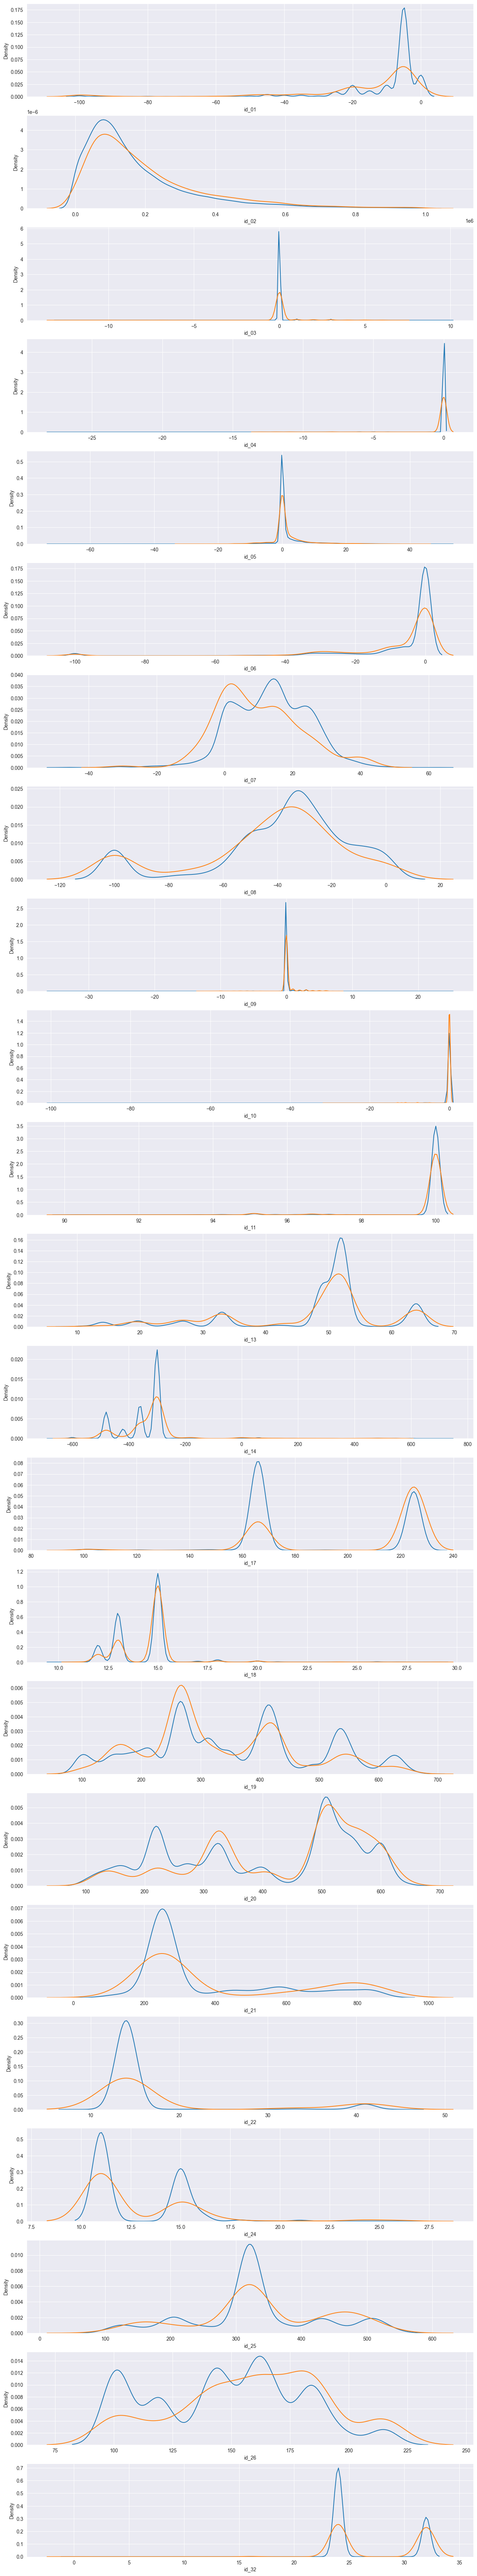

In [ ]:
# sns.set_style(style='darkgrid')
# plt.figure(figsize=(16, len(id_num_cols)*4))
# # plt.subplots(sharex=True)
# gs = plt.GridSpec(nrows=len(id_num_cols), ncols=1)
# for i, id_col in enumerate(id_num_cols):
#     ax = plt.subplot(gs[i])
#     sns.kdeplot(ax=ax, data=df_valid[id_col])
#     sns.kdeplot(ax=ax, data=df_fraud[id_col])
#     # sns.histplot(ax=ax, data=df_valid[id_col], kde=True, bins=100)
#     # sns.histplot(ax=ax, data=df_fraud[id_col], kde=True, bins=100)
# plt.show()
